<a href="https://colab.research.google.com/github/CipluxX/Metode-Numerik-Implementasi-Interpolasi/blob/main/Implementasi_Interpolasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

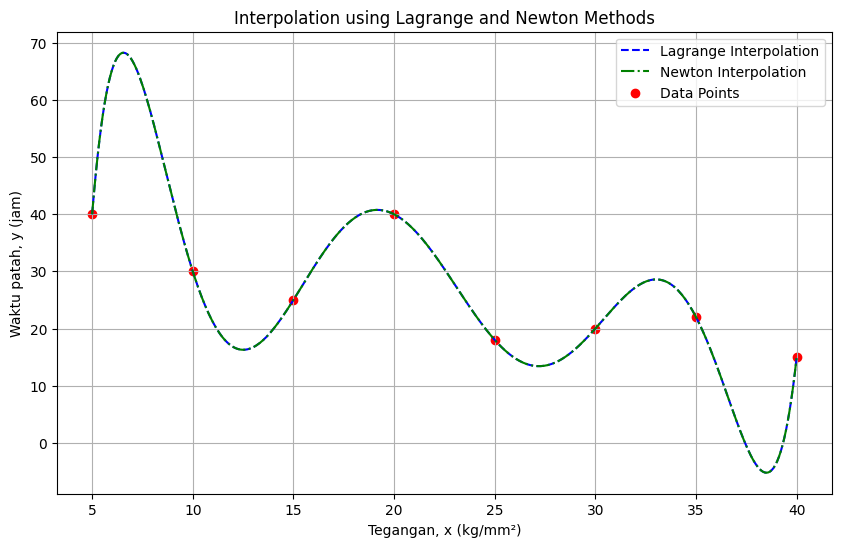

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_values = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def lagrange_interpolation(x, x_points, y_points):
    def basis_polynomial(k, x):
        result = 1
        for j in range(len(x_points)):
            if j != k:
                result *= (x - x_points[j]) / (x_points[k] - x_points[j])
        return result

    interpolation_result = 0
    for k in range(len(x_points)):
        interpolation_result += y_points[k] * basis_polynomial(k, x)
    return interpolation_result

def newton_interpolation(x, x_points, y_points):
    n = len(x_points)
    coef = np.zeros([n, n])
    coef[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x_points[i + j] - x_points[i])

    def newton_basis(x, x_points, k):
        result = 1
        for i in range(k):
            result *= (x - x_points[i])
        return result

    interpolation_result = 0
    for k in range(n):
        interpolation_result += coef[0, k] * newton_basis(x, x_points, k)
    return interpolation_result

x_plot = np.linspace(5, 40, 400)
y_lagrange = np.array([lagrange_interpolation(x, x_values, y_values) for x in x_plot])
y_newton = np.array([newton_interpolation(x, x_values, y_values) for x in x_plot])

plt.figure(figsize=(10, 6))  # Mengubah ukuran plot menjadi 10x6
plt.plot(x_plot, y_lagrange, label='Lagrange Interpolation', color='blue', linestyle='--')  # Menggunakan garis putus-putus untuk Lagrange
plt.plot(x_plot, y_newton, label='Newton Interpolation', color='green', linestyle='-.')  # Menggunakan garis titik-garis untuk Newton
plt.scatter(x_values, y_values, color='red', marker='o', label='Data Points')  # Mengubah simbol titik data menjadi lingkaran merah
plt.title('Interpolation using Lagrange and Newton Methods')
plt.xlabel('Tegangan, x (kg/mm²)')
plt.ylabel('Waktu patah, y (jam)')
plt.legend()
plt.grid(True)
plt.show()